# Гулякевич Анна , БС-83, лабораторна робота №5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd, xlwt

In [2]:
data = pd.read_csv('D:\бмд\кп 5\SolarPrediction.csv')
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:
processData = data[['Speed', 'Humidity']]

processData.sort_values('Speed', ascending=False)

less4 = processData.loc[processData['Speed'] < 4]
from5to6 = processData.loc[(processData['Speed'] >= 5) & (processData['Speed'] <= 6)]
from7to8 = processData.loc[(processData['Speed'] >= 7) & (processData['Speed'] <= 8)]
more9 = processData.loc[processData['Speed'] >= 9 & (processData['Speed'] <= 10)]

processData = pd.DataFrame ( 
    [less4.sum(), from5to6.sum(), from7to8.sum(), more9.sum()],
    columns = ['Humidity'],
    index = ['less4', 'from5to6', 'from7to8', 'more9']
)

n = processData.shape[0]

sumWon = processData['Humidity'].sum()

processData['TheoreticalHumidity'] = (sumWon/n) *n

processData

,Humidity,TheoreticalHumidity
less4,704478.0,3706086.0
from5to6,343548.0,3706086.0
from7to8,249778.0,3706086.0
more9,2408282.0,3706086.0


2. Побудувати графік, що відображає розподіл ознак в групах.

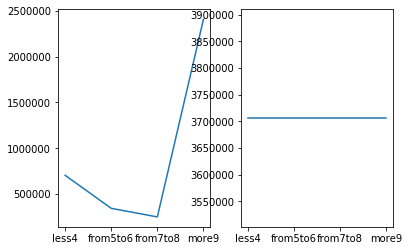

In [4]:
fig = plt.subplots(1,2)

plt.subplot(1, 2, 1)
plt.plot(processData.index, processData['Humidity'])

plt.subplot(1, 2, 2)
plt.plot(processData.index, processData['TheoreticalHumidity'])

3. Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [5]:
def pearson(significant_level, realData, expectedData):
    
    if not (significant_level == 0.01 
            or significant_level == 0.05):
        significant_level = 0.01
    
    if not abs(sum(realData) - sum(expectedData)) < 0.000001:
        expectedexpectedData = expectedData / sum(expectedData) * sum(realData)
        
    pTable = pd.read_excel('file:///D:\бмд\кп%205\pTable.xlsx')
    pTable = pTable.loc[1:, :]
    pTable = pTable.rename(columns={"Unnamed: 0": "level of significance", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    pTable.set_index("level of significance", inplace=True)
    
    chiSquared = sum([ (pow(r - e, 2) / e)
                      for r, e in zip(realData, expectedData)
                     ])
                  
    rCoef = len(realData) - 1
    
    tableValueToCompare = pTable.loc[rCoef, significant_level]
    
    return tableValueToCompare < chiSquared

4. Перевірити розбіжність між групами на даних з п. 1.

In [6]:
processData.insert(1, 'Humidity %',
                     (np.array([x for x in processData['Humidity']]) / processData['Humidity'].sum() * 100)
                  )
processData.insert(3, 'TheoreticalHumidity %',
                    (np.array([x for x in processData['TheoreticalHumidity']]) / processData['TheoreticalHumidity'].sum() * 100)
                  )

In [7]:
processData

,Humidity,Humidity %,TheoreticalHumidity,TheoreticalHumidity %
less4,704478.0,19.008679,3706086.0,25.0
from5to6,343548.0,9.269833,3706086.0,25.0
from7to8,249778.0,6.739671,3706086.0,25.0
more9,2408282.0,64.981816,3706086.0,25.0


Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)

In [8]:
significantLevel01 = pearson(0.01, processData['Humidity'], processData['TheoreticalHumidity'] )
significantLevel05 = pearson (0.05, processData['Humidity'], processData['TheoreticalHumidity'] )

results = pd.DataFrame ( 
    [significantLevel01, significantLevel05],
    columns = ["Statistical discrepancy"],
    index = ['0.01', '0.05']
)

results.index.name = 'Level of signifance'

results

,Statistical discrepancy
Level of signifance,
0.01,True
0.05,True
